In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importing the data
df = pd.read_csv('Spotify.csv')
df.head(10)

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990
5,Alright,Janet Jackson,3:39,4,0.796,0.766,7,-5.974,1,0.2380,0.0742,0.000000,0.0827,0.558,110.034,80,1990
6,Love Song,Tesla,2:28,4,0.640,0.355,5,-10.599,1,0.0906,0.8300,0.000938,0.1100,0.451,120.063,79,1990
7,Poison,Bell Biv DeVoe,3:32,3,0.689,0.394,2,-10.102,0,0.0650,0.7110,0.000905,0.0859,0.382,117.489,79,1990
8,Enjoy The Silence,Depeche Mode,4:17,4,0.626,0.667,0,-11.817,0,0.0283,0.2090,0.000257,0.0779,0.830,112.776,78,1990
9,Free Fallin’,Tom Petty,4:16,4,0.623,0.449,5,-13.333,1,0.0253,0.2120,0.000000,0.0613,0.573,84.383,78,1990


# Task 3: Data Pre Processing

In [4]:
#data overview

# Display basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64


In [6]:
print("Shape of DataFrame Before Removing Duplicates: ", df.shape)

Shape of DataFrame Before Removing Duplicates:  (919, 17)


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [8]:
# Identify the Outliers
q1 = df['Popularity'].quantile(0.25)
q3 = df['Popularity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Popularity'] = np.where(df['Popularity'] < lower_bound, lower_bound, df['Popularity'])
df['Popularity'] = np.where(df['Popularity'] > upper_bound, upper_bound, df['Popularity'])


In [9]:
print(iqr)

21.0


In [10]:
# Convert 'duration' from 'MM:SS' format to total seconds
df['Duration_seconds'] = df['Duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Now 'duration_seconds' is a numeric column you can use in your analysis


In [11]:
# Check for NaN values in the entire dataset
nan_count = df.isna().sum()

# Display the count of NaN values in each column
print(nan_count)


Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
Duration_seconds    0
dtype: int64


# Task 4: Exploratory Data Analysis

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
print("Data Overview:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    float64
 16  Year              919 non-nul

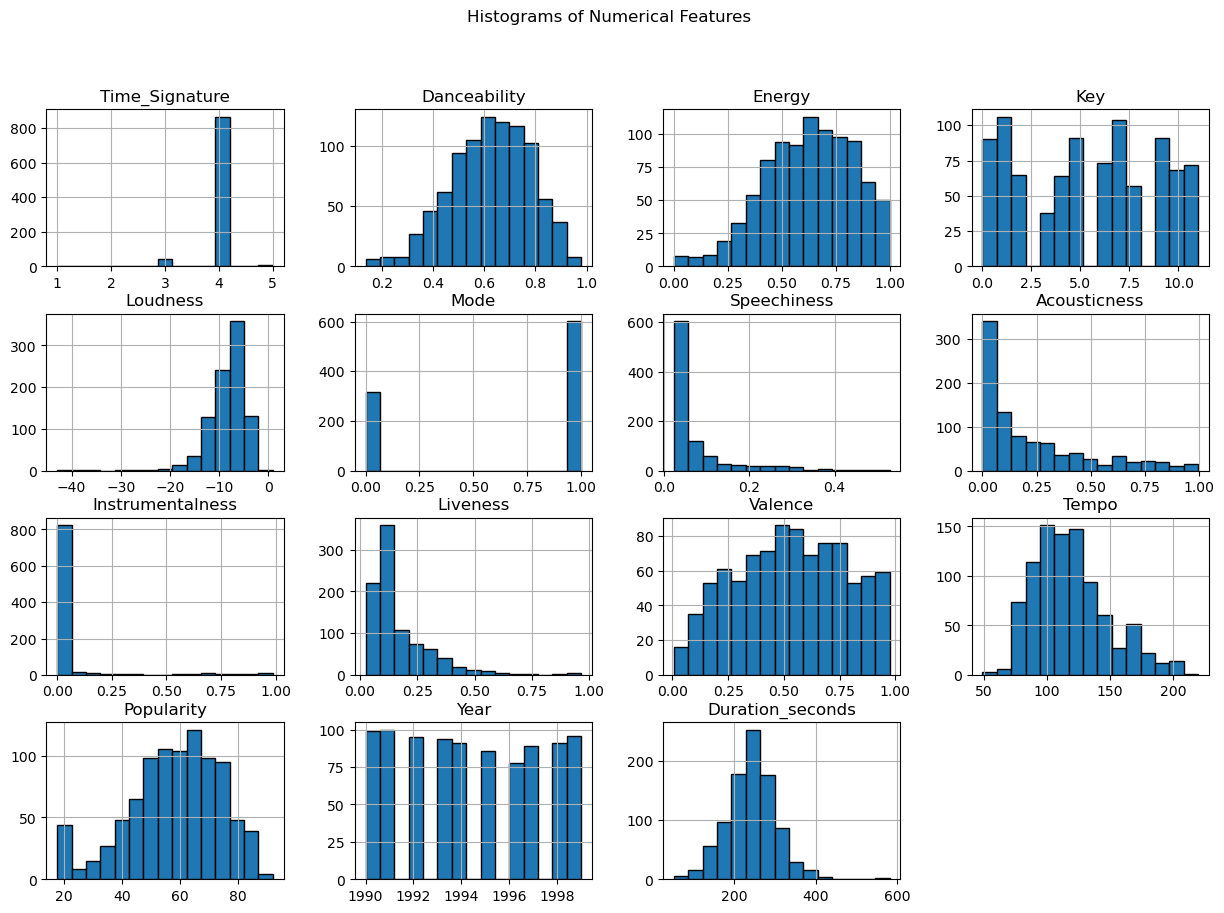

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


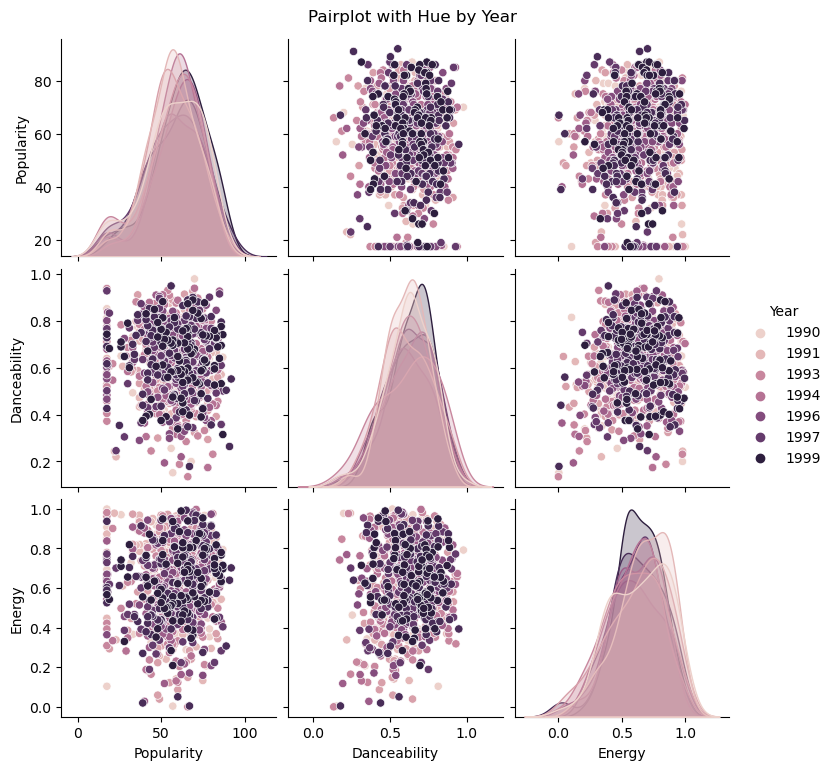

In [18]:
# Pairplot with hue based on a categorical variable (replace with a relevant categorical column if available)
sns.pairplot(df, hue='Year', vars=['Popularity', 'Danceability', 'Energy'])
plt.suptitle('Pairplot with Hue by Year', y=1.02)
plt.show()


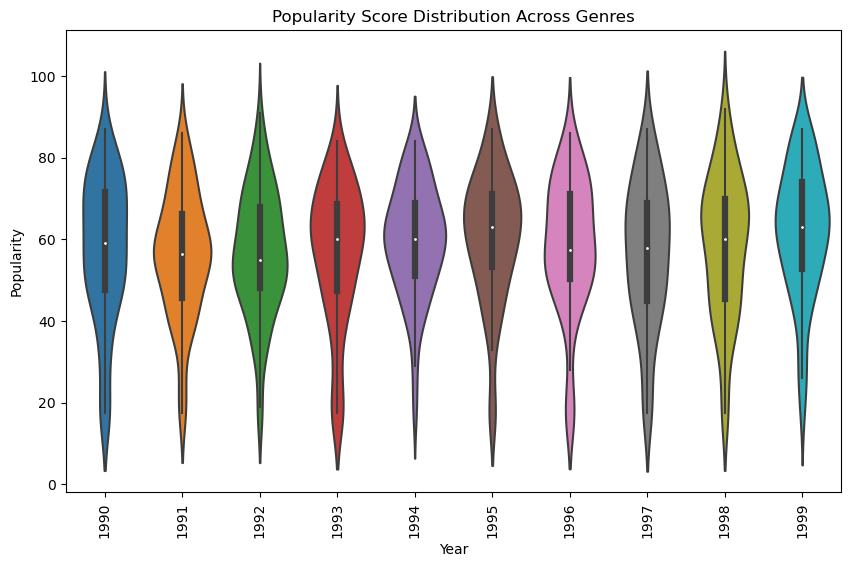

In [19]:
# Violin plot to explore distribution and relationships
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Popularity', data=df)
plt.title('Popularity Score Distribution Across Genres')
plt.xticks(rotation=90)
plt.show()


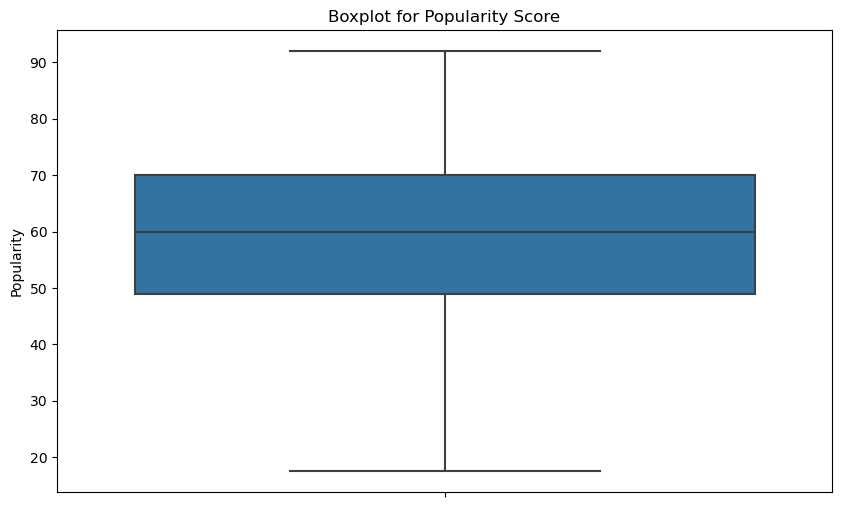

In [20]:
# Boxplot for outlier detection in a specific variable
plt.figure(figsize=(10, 6))
sns.boxplot(y='Popularity', data=df)
plt.title('Boxplot for Popularity Score')
plt.show()


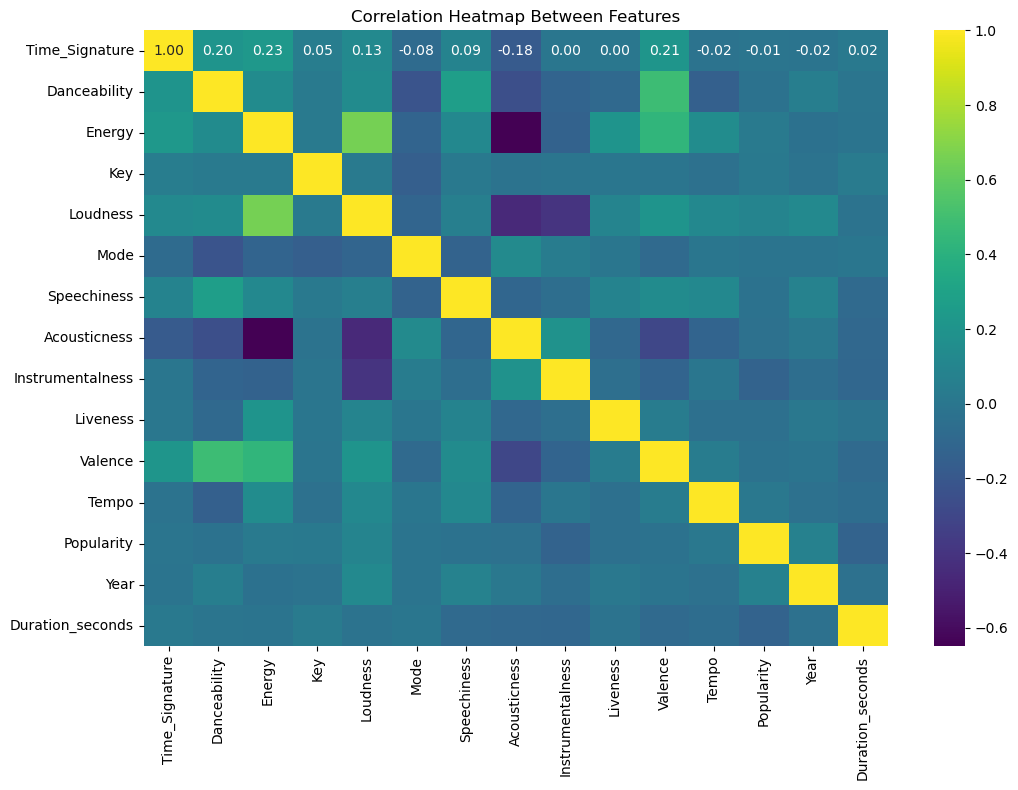

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap Between Features')
plt.show()

# Task 5: Data Visualization

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


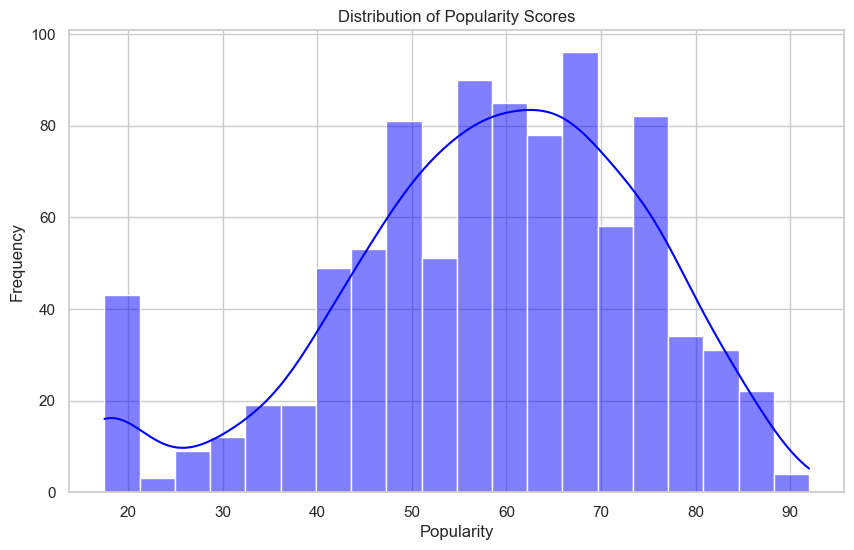

In [122]:
# Distribution of Popularity Scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


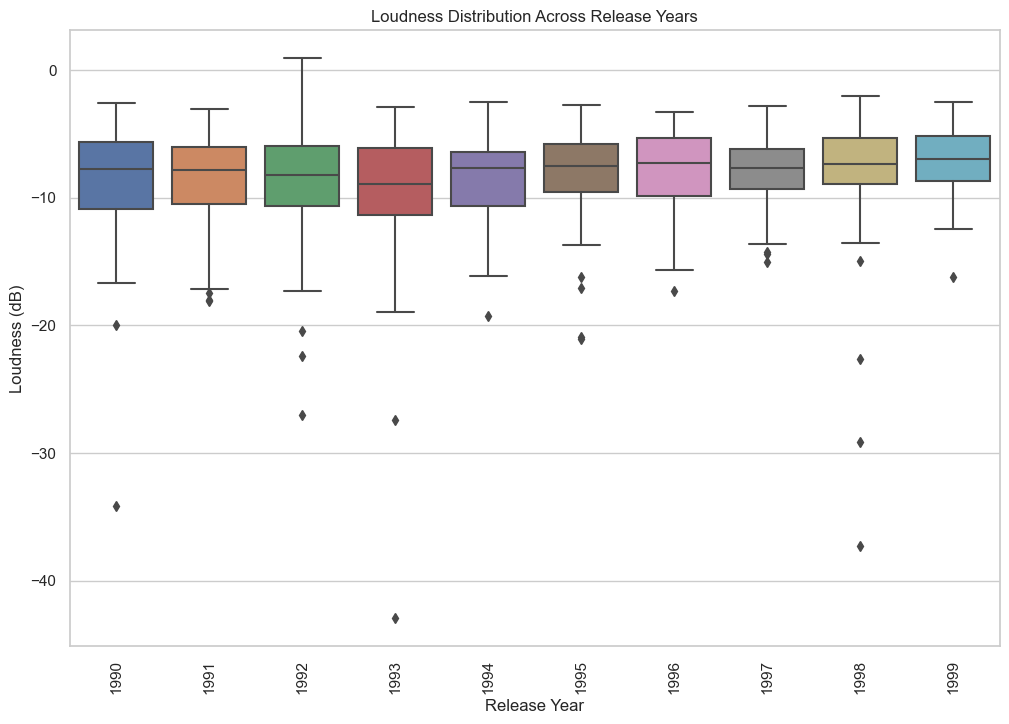

In [127]:
# How does the loudness of songs vary across different release years? Have there been changes in production loudness over time?

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Loudness', data=df)
plt.title('Loudness Distribution Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Loudness (dB)')
plt.xticks(rotation=90)
plt.show()


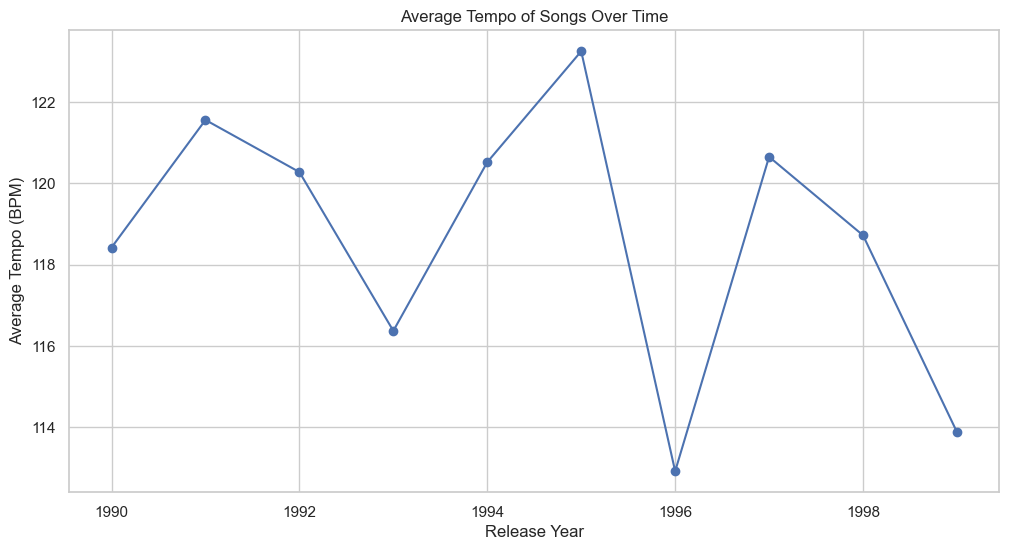

In [128]:
# How has the average tempo of songs evolved over time? Are songs generally becoming faster or slower?

avg_tempo_per_year = df.groupby('Year')['Tempo'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_tempo_per_year.index, avg_tempo_per_year.values, marker='o', linestyle='-')
plt.title('Average Tempo of Songs Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.grid(True)
plt.show()


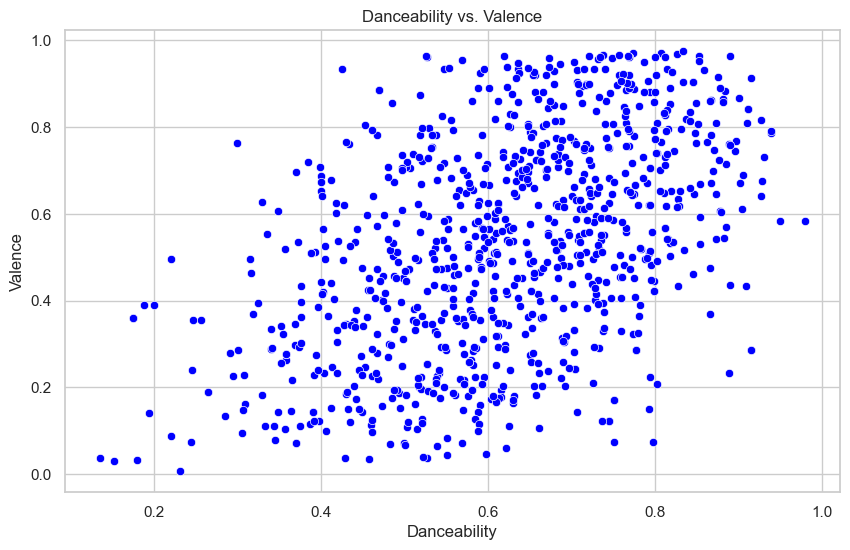

In [129]:
# Is there a relationship between danceability and valence (positivity)? Are more danceable songs generally more positive?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Danceability', y='Valence', data=df, color='blue')
plt.title('Danceability vs. Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()


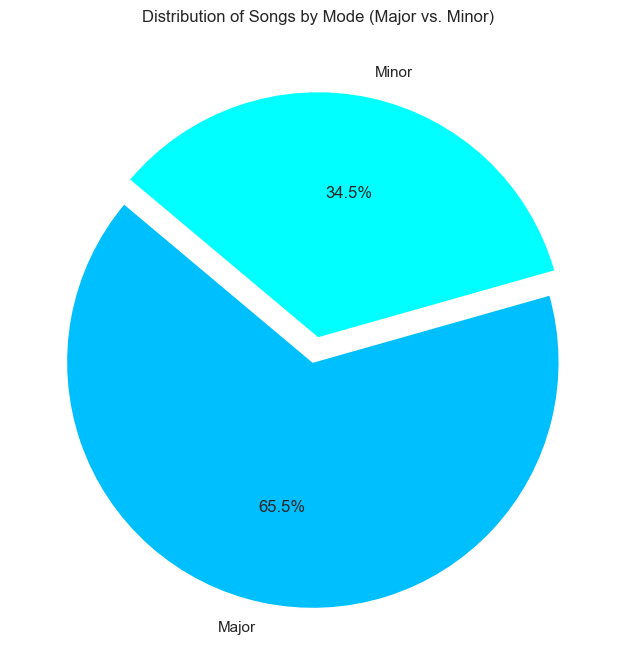

In [160]:
import matplotlib.pyplot as plt

# Pie chart showing the proportion of songs in major (mode = 1) and minor (mode = 0) keys:
mode_counts = df['Mode'].value_counts()

# Labels for the pie chart
labels = ['Major', 'Minor']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=labels, autopct='%1.1f%%', colors=['deepskyblue', 'cyan'], startangle=140, explode=(0.1, 0))
plt.title('Distribution of Songs by Mode (Major vs. Minor)')
plt.show()


# Predictive Analysis

In [208]:
import pandas as pd

# Assuming df is your DataFrame

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Find pairs of columns with a strong positive or negative correlation
threshold = 0.7  # You can adjust this threshold based on your needs

# Extract the pairs that have a correlation above the positive threshold or below the negative threshold
strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Flatten the matrix and reset index for easier interpretation
strong_pairs = strong_correlations.unstack().dropna().reset_index()

# Rename columns for clarity
strong_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

# Remove duplicate pairs (e.g., (A, B) and (B, A) are the same)
strong_pairs['abs_corr'] = strong_pairs['Correlation'].abs()
strong_pairs = strong_pairs.sort_values(by='abs_corr', ascending=False).drop_duplicates(subset=['abs_corr']).drop('abs_corr', axis=1)

print("\nPairs of columns with strong correlation (Potential good fit for Linear Regression):")
print(strong_pairs)


Correlation Matrix:
                  Time_Signature  Danceability    Energy       Key  Loudness  \
Time_Signature          1.000000      0.202602  0.227979  0.046251  0.128167   
Danceability            0.202602      1.000000  0.139051  0.021252  0.141140   
Energy                  0.227979      0.139051  1.000000  0.024410  0.654923   
Key                     0.046251      0.021252  0.024410  1.000000  0.021588   
Loudness                0.128167      0.141140  0.654923  0.021588  1.000000   
Mode                   -0.076332     -0.221745 -0.127359 -0.154614 -0.118116   
Speechiness             0.090726      0.266100  0.119557  0.017963  0.054214   
Acousticness           -0.184136     -0.250797 -0.649640 -0.019595 -0.462260   
Instrumentalness        0.000617     -0.126852 -0.138588 -0.011322 -0.401083   
Liveness                0.002077     -0.090449  0.204731 -0.002880  0.095929   
Valence                 0.210218      0.479456  0.427414 -0.007300  0.206332   
Tempo               

Loudness vs Energy - Mean Squared Error: 8.644688709896869
Loudness vs Energy - R-squared: 0.4289246440255361


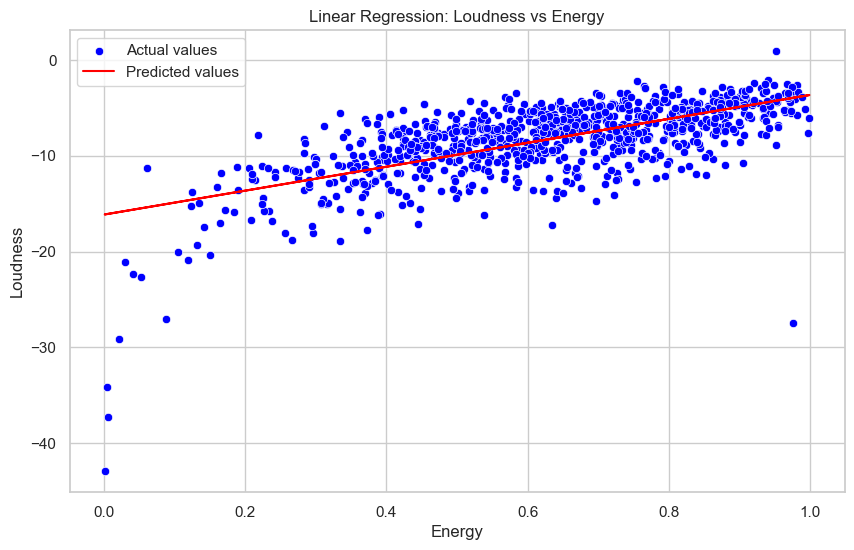

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and it has columns 'loudness' and 'energy'

# Prepare the data
X_loudness_energy = df[['Energy']]  # Feature: Energy
y_loudness = df['Loudness']  # Target: Loudness

# Fit the model
model_loudness_energy = LinearRegression()
model_loudness_energy.fit(X_loudness_energy, y_loudness)

# Predict values
y_loudness_pred = model_loudness_energy.predict(X_loudness_energy)
# Predict values


# Evaluate the model
mse_loudness_energy = mean_squared_error(y_loudness, y_loudness_pred)
r2_loudness_energy = r2_score(y_loudness, y_loudness_pred)

print(f"Loudness vs Energy - Mean Squared Error: {mse_loudness_energy}")
print(f"Loudness vs Energy - R-squared: {r2_loudness_energy}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Loudness', data=df, color='blue', label='Actual values')
plt.plot(df['Energy'], y_loudness_pred, color='red', label='Predicted values')
plt.title('Linear Regression: Loudness vs Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend()
plt.show()


Acousticness vs Energy - Mean Squared Error: 0.03792047845066375
Acousticness vs Energy - R-squared: 0.4220319025028527


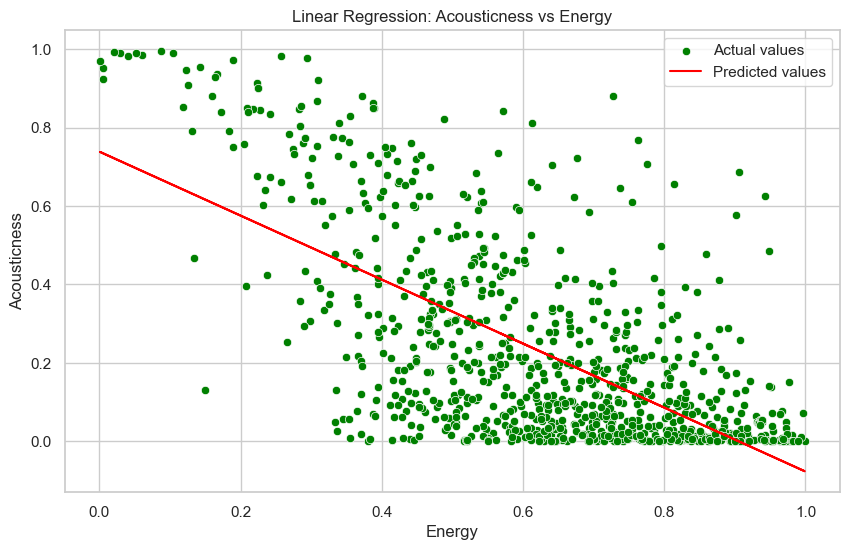

In [212]:
# Prepare the data
X_acousticness_energy = df[['Energy']]  # Feature: Energy
y_acousticness = df['Acousticness']  # Target: Acousticness

# Fit the model
model_acousticness_energy = LinearRegression()
model_acousticness_energy.fit(X_acousticness_energy, y_acousticness)

# Predict values
y_acousticness_pred = model_acousticness_energy.predict(X_acousticness_energy)

# Evaluate the model
mse_acousticness_energy = mean_squared_error(y_acousticness, y_acousticness_pred)
r2_acousticness_energy = r2_score(y_acousticness, y_acousticness_pred)

print(f"Acousticness vs Energy - Mean Squared Error: {mse_acousticness_energy}")
print(f"Acousticness vs Energy - R-squared: {r2_acousticness_energy}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Acousticness', data=df, color='green', label='Actual values')
plt.plot(df['Energy'], y_acousticness_pred, color='red', label='Predicted values')
plt.title('Linear Regression: Acousticness vs Energy')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.legend()
plt.show()
